<a href="https://colab.research.google.com/github/Omar3ab3aziz/Hawks/blob/main/Hawk_Species_Classification_Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Hawk Species Classification Project

## SECTION 1: IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

## SECTION 2: LOAD AND INSPECT DATA

In [2]:
df = pd.read_csv("Hawks.csv")
print("Initial Shape:", df.shape)
df.head(20)

Initial Shape: (908, 20)


,rownames,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,1,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN
1,2,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,3,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN
3,4,9,23,1992,10:50,,745-49508,CH,I,F,265.0,470.0,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN
4,5,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,170.0,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN
5,6,9,28,1992,11:25,,1207-55910,RT,I,NaN,412.0,1090.0,28.5,32.2,230,NaN,NaN,NaN,NaN,NaN
6,7,9,28,1992,13:30,,877-76320,RT,I,NaN,370.0,960.0,25.3,30.1,212,NaN,NaN,NaN,NaN,NaN
7,8,9,29,1992,11:45,,877-76321,RT,A,NaN,375.0,855.0,27.2,30.0,243,NaN,NaN,NaN,NaN,NaN
8,9,9,29,1992,15:35,,877-76322,RT,A,NaN,412.0,1210.0,29.3,31.3,210,NaN,NaN,NaN,NaN,NaN
9,10,9,30,1992,13:45,,1207-55911,RT,I,NaN,405.0,1120.0,26.0,30.2,238,NaN,NaN,NaN,NaN,NaN


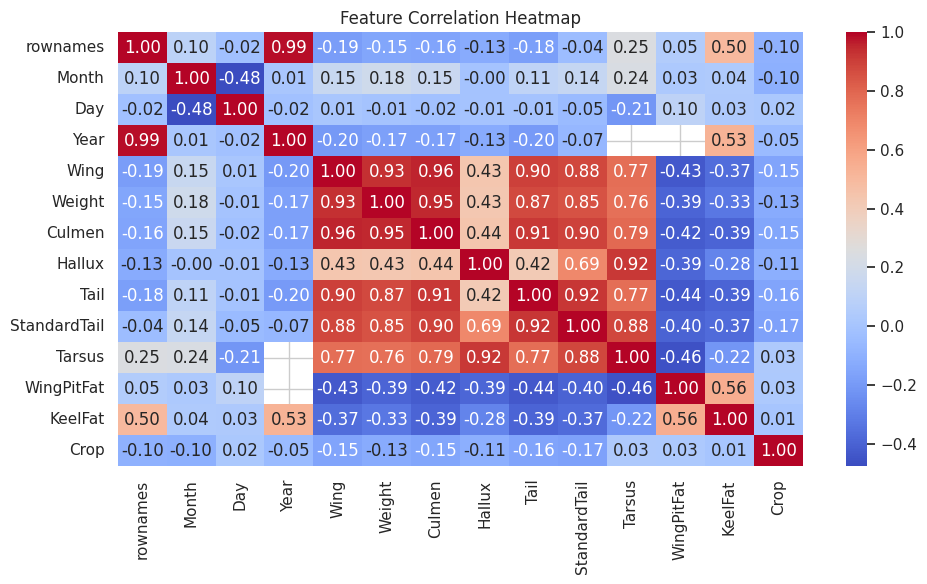

In [3]:
# Correlation Heatmap (excluding categorical if needed)
plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

## SECTION 3: DATA CLEANING & PREPROCESSING

Current Shape: (908, 20)
Index(['rownames', 'Month', 'Day', 'Year', 'CaptureTime', 'ReleaseTime',
       'BandNumber', 'Species', 'Age', 'Sex', 'Wing', 'Weight', 'Culmen',
       'Hallux', 'Tail', 'StandardTail', 'Tarsus', 'WingPitFat', 'KeelFat',
       'Crop'],
      dtype='object')
Current Shape: (908, 6)
  Species   Wing  Weight  Culmen  Hallux  Tail
0      RT  385.0   920.0    25.7    30.1   219
1      RT  376.0   930.0     NaN     NaN   221
2      RT  381.0   990.0    26.7    31.3   235
3      CH  265.0   470.0    18.7    23.5   220
4      SS  205.0   170.0    12.5    14.3   157
Missing values:
 Species     0
Wing        1
Weight     10
Culmen      7
Hallux      6
Tail        0
dtype: int64


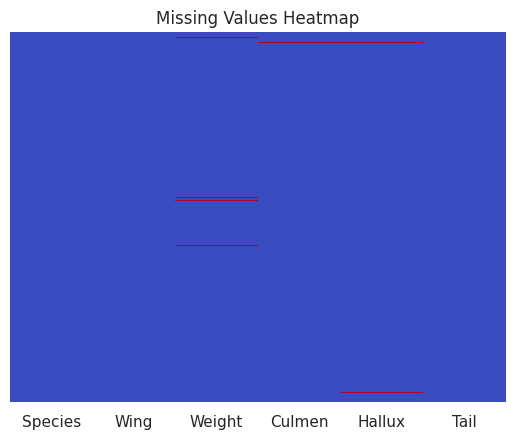

Dropped 0 rows with missing target.
Missing values again:
 Species    0
Wing       0
Weight     0
Culmen     0
Hallux     0
Tail       0
dtype: int64
Species label mapping: {'CH': np.int64(0), 'RT': np.int64(1), 'SS': np.int64(2)}
Removed 0 duplicate rows.
Current Shape: (908, 6)


In [4]:
print("Current Shape:", df.shape)

# Display current columns
print(df.columns)


# Keep only the relevant columns
df = df[['Species', 'Wing', 'Weight', 'Culmen', 'Hallux', 'Tail']]

print("Current Shape:", df.shape)

# Display the first few rows to verify
print(df.head())

# Check missing values
print("Missing values:\n", df.isnull().sum())
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Drop rows with missing target
before = df.shape[0]
df = df.dropna(subset=['Species'])
after = df.shape[0]
print(f"Dropped {before - after} rows with missing target.")

# Fill missing numerical values using the median within each Species group
df[['Wing', 'Weight', 'Culmen', 'Hallux', 'Tail']] = (
    df.groupby('Species')[['Wing', 'Weight', 'Culmen', 'Hallux', 'Tail']]
    .transform(lambda x: x.fillna(x.median()))
)
print("Missing values again:\n", df.isnull().sum())

# Encode target
label_enc = LabelEncoder()
df['Species'] = label_enc.fit_transform(df['Species'])
species_names = label_enc.classes_  # Saving the class names in order
print("Species label mapping:", dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_))))

# Check for duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")

print("Current Shape:", df.shape)


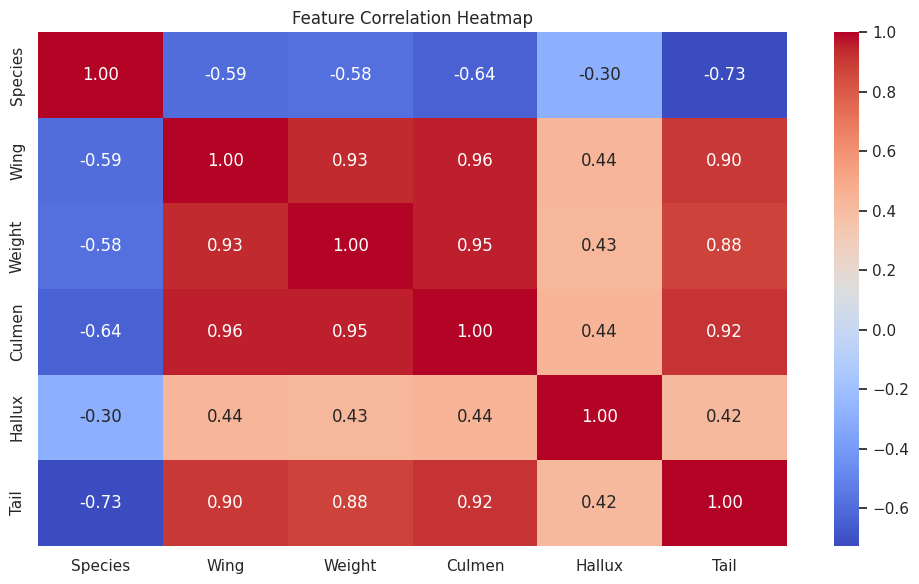

In [5]:
# Correlation Heatmap (excluding categorical if needed)
plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

## SECTION 4: OUTLIER DETECTION

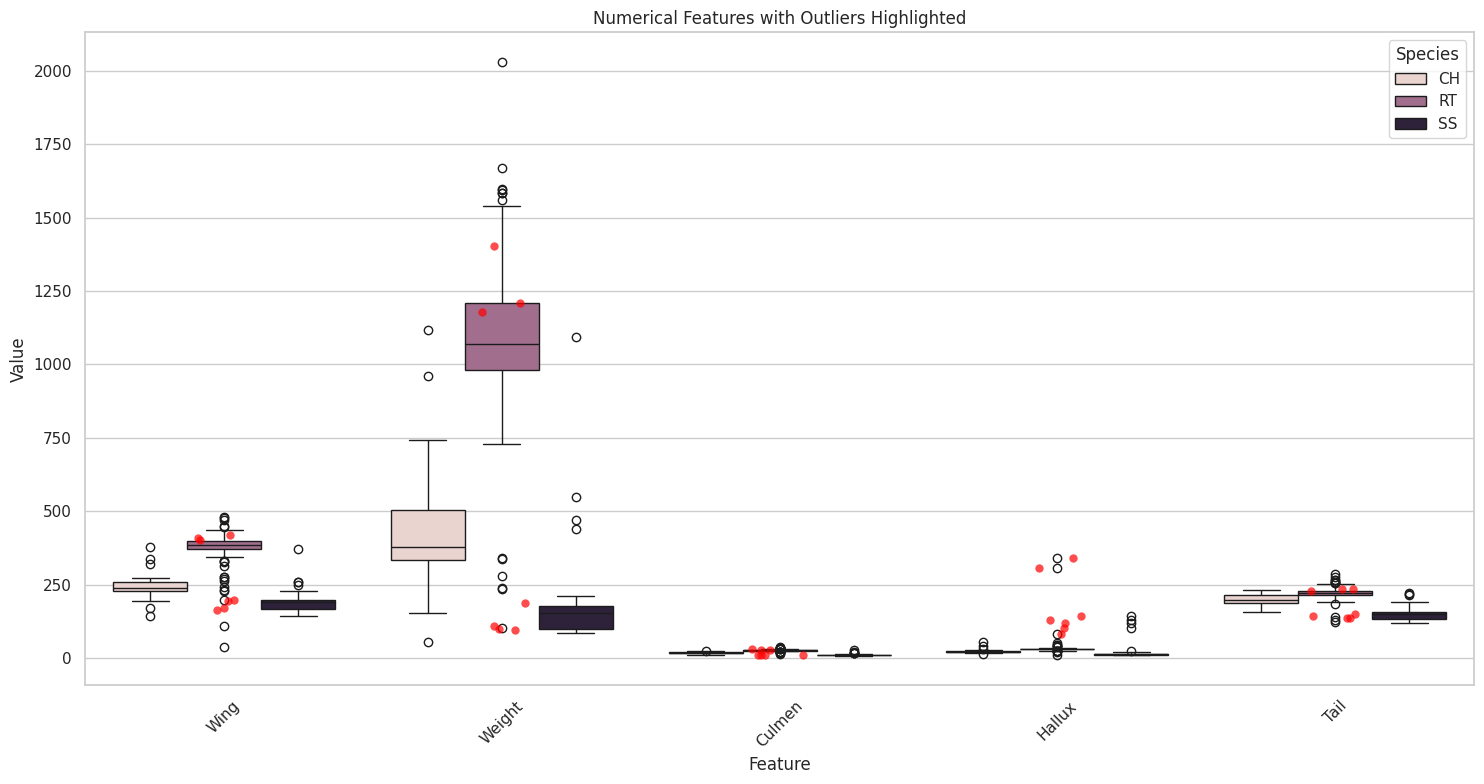

In [6]:
# Initialize a new column to track outliers
num_cols = ['Wing', 'Weight', 'Culmen', 'Hallux', 'Tail']

df['Outlier'] = False

# Detect outliers per numerical column
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df['Outlier'] |= (df[col] < lower) | (df[col] > upper)

# Melt the dataframe for visualization
df_melted = df.melt(id_vars=['Species', 'Outlier'], value_vars=num_cols, var_name='Feature', value_name='Value')

# Visualize boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(x='Feature', y='Value', data=df_melted, hue='Species', dodge=True)

# Overlay red circles for outliers
outliers = df_melted[df_melted['Outlier']]
sns.stripplot(x='Feature', y='Value', data=outliers, color='red', size=6, marker='o', jitter=True, dodge=True, alpha=0.7)

# Convert species numbers back to labels
handles, labels = plt.gca().get_legend_handles_labels()
if df['Species'].dtype in [np.int32, np.int64]: labels = [label_enc.classes_[int(label)] for label in labels]
plt.legend(handles, labels, title='Species', loc='upper right')

plt.title('Numerical Features with Outliers Highlighted')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## SECTION 5: FEATURE SCALING

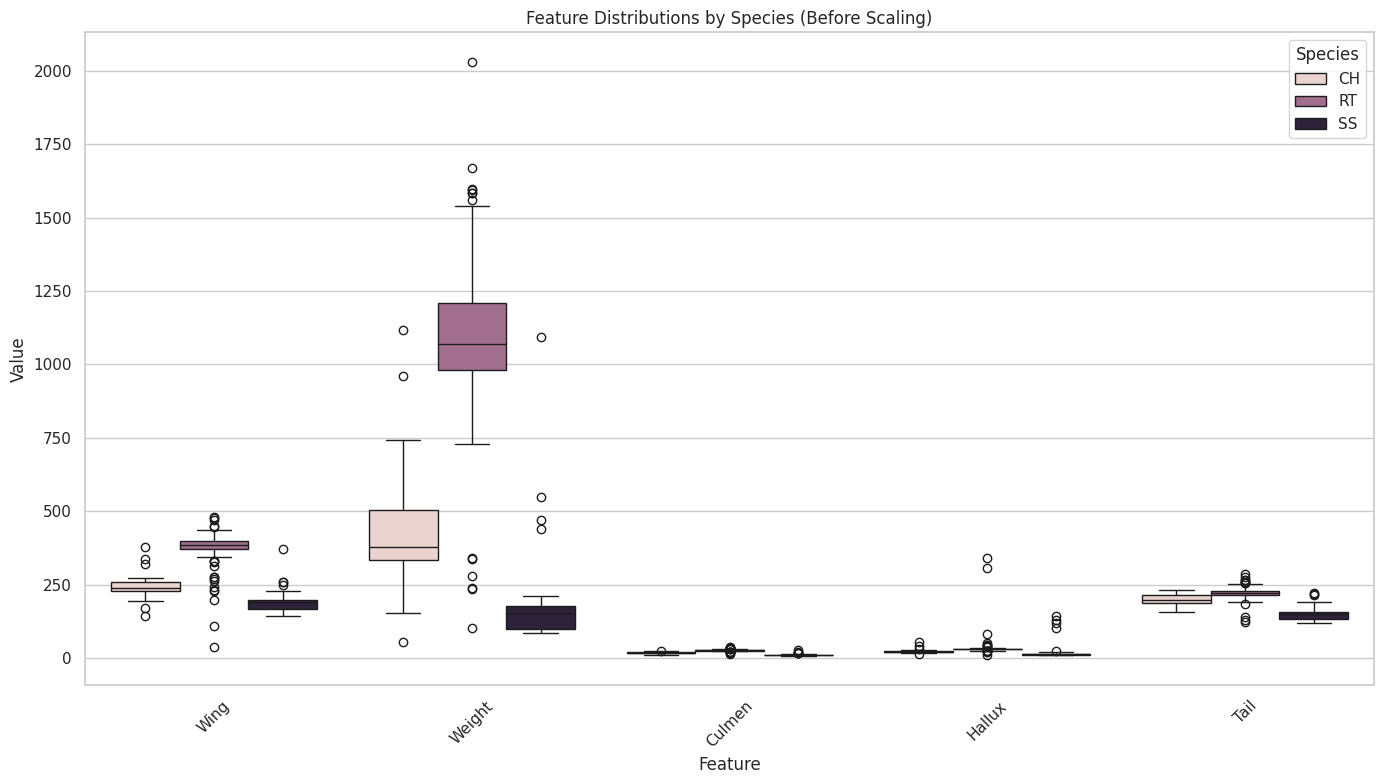

In [7]:
# Features and labels
X = df[['Wing', 'Weight', 'Culmen', 'Hallux', 'Tail']]
y = df['Species']

# Combine for plotting
df_before_scaling = pd.concat([X, y], axis=1)

# Plot boxplots per feature grouped by species
plt.figure(figsize=(14, 8))
df_melted = df_before_scaling.melt(id_vars='Species', var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='Species', data=df_melted)
plt.title("Feature Distributions by Species (Before Scaling)")
plt.xticks(rotation=45)
plt.tight_layout()

# Convert species numbers back to labels
handles, labels = plt.gca().get_legend_handles_labels()
if df['Species'].dtype in [np.int32, np.int64]: labels = [label_enc.classes_[int(label)] for label in labels]
plt.legend(handles, labels, title='Species', loc='upper right')

plt.show()

Scaled Feature Shape: (908, 6)
       Wing    Weight    Culmen    Hallux      Tail  Species
0  0.729429  0.323764  0.536864  0.210140  0.547996        1
1  0.634897  0.345394  0.687905  0.249727  0.602338        1
2  0.687415  0.475179  0.674174  0.278004  0.982730        1
3 -0.531000 -0.649621 -0.424309 -0.163110  0.575167        0
4 -1.161214 -1.298544 -1.275632 -0.683398 -1.136598        2


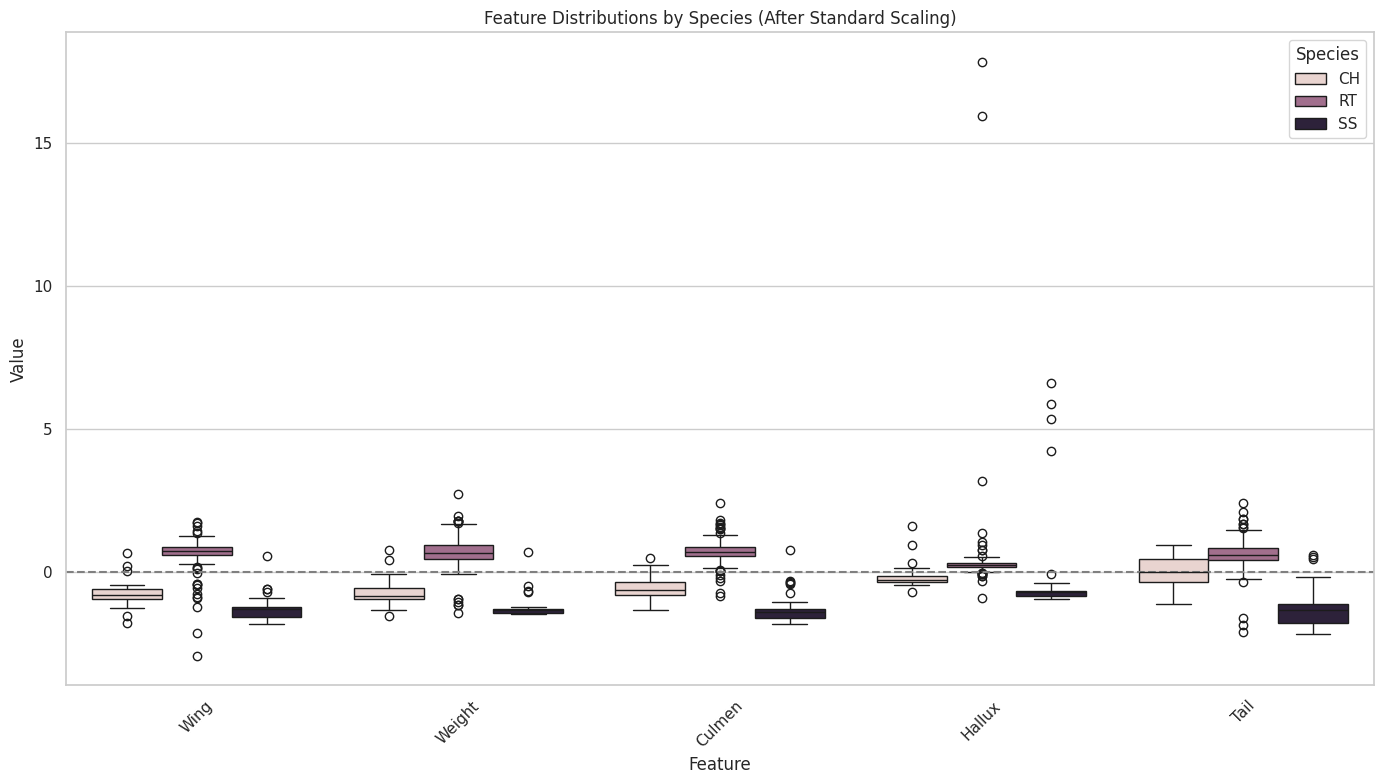

In [8]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Species'] = y.values

# Show shape and head
print("Scaled Feature Shape:", X_scaled_df.shape)
print(X_scaled_df.head())

# Melt and plot
plt.figure(figsize=(14, 8))
df_melted_scaled = X_scaled_df.melt(id_vars='Species', var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='Species', data=df_melted_scaled)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Feature Distributions by Species (After Standard Scaling)")
plt.xticks(rotation=45)
plt.tight_layout()
# Convert species numbers back to labels
handles, labels = plt.gca().get_legend_handles_labels()
if df['Species'].dtype in [np.int32, np.int64]: labels = [label_enc.classes_[int(label)] for label in labels]
plt.legend(handles, labels, title='Species', loc='upper right')
plt.show()


## SECTION 6: DIMENSIONALITY REDUCTION (PCA)

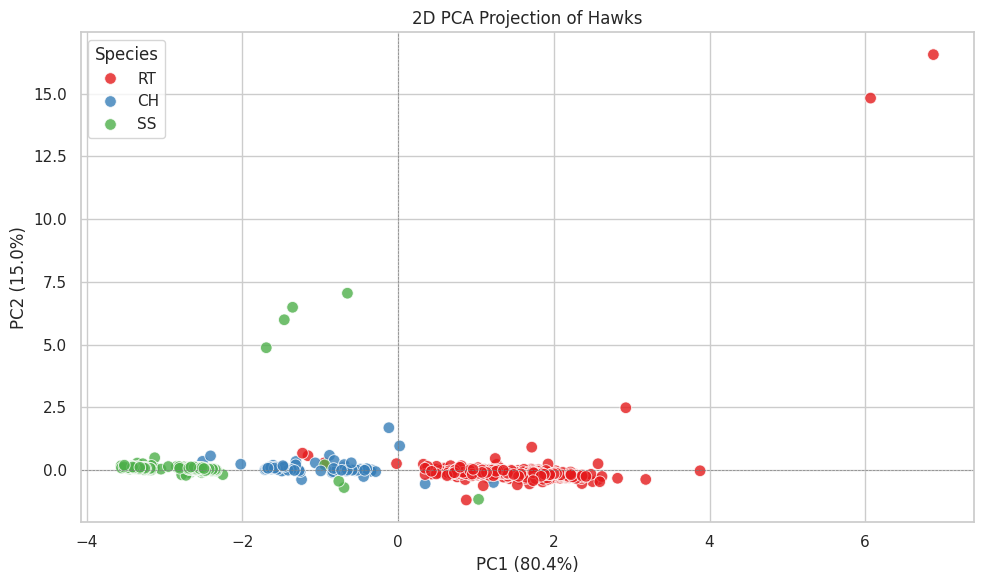

In [9]:
# Map encoded labels back to species names
y_labels = label_enc.inverse_transform(y)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot using seaborn, which will handle color-label matching automatically
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y_labels,  # use original class names
    palette='Set1',
    s=70,
    alpha=0.8
)

plt.title("2D PCA Projection of Hawks")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.axhline(0, color='gray', linestyle='--', lw=0.5)
plt.axvline(0, color='gray', linestyle='--', lw=0.5)

plt.legend(title="Species", loc="best")
plt.tight_layout()
plt.show()


## SECTION 7: DATA RANDAMIZATION & SPLITTINGS

In [10]:
# Save a copy of the original (pre-shuffle) dataset
df_before_shuffle = df.copy()

# Shuffle the dataset
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)

# Compare before and after
print("Before shuffle:")
print(df_before_shuffle.head(20))  # show first 20 rows before shuffling

print("\nAfter shuffle:")
print(df.head(20))  # show first 20 rows after shuffling

Before shuffle:
    Species   Wing  Weight  Culmen  Hallux  Tail  Outlier
0         1  385.0   920.0    25.7    30.1   219    False
1         1  376.0   930.0    26.8    30.8   221    False
2         1  381.0   990.0    26.7    31.3   235    False
3         0  265.0   470.0    18.7    23.5   220    False
4         2  205.0   170.0    12.5    14.3   157    False
5         1  412.0  1090.0    28.5    32.2   230    False
6         1  370.0   960.0    25.3    30.1   212    False
7         1  375.0   855.0    27.2    30.0   243    False
8         1  412.0  1210.0    29.3    31.3   210    False
9         1  405.0  1120.0    26.0    30.2   238    False
10        1  393.0  1010.0    26.3    30.8   222    False
11        1  371.0  1010.0    25.4    29.7   217    False
12        1  390.0  1120.0    28.9    30.9   213    False
13        1  393.0  1070.0    28.2    30.6   238    False
14        1  416.0  1170.0    26.5    34.0   243    False
15        1  436.0  1390.0    30.5    34.0   232    Fals

In [11]:
# Splitting data
splits = {
    "80% Training": train_test_split(X_scaled, y, test_size=0.2, random_state=42),
    "20% Training": train_test_split(X_scaled, y, test_size=0.8, random_state=42),
    "5% Training": train_test_split(X_scaled, y, test_size=0.95, random_state=42),
}

## SECTION 8: MODELS COMPARISON

In [12]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
}

# Initialize storage for results
results = []

# Loop over each split and evaluate all models
for split_name, (X_train, X_test, y_train, y_test) in splits.items():
    print(f"\n====== Split: {split_name} ======")
    for name, model in models.items():
        print(f"\n--- {name} ---")
        scores = cross_val_score(model, X_train, y_train, cv=5)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        acc = accuracy_score(y_test, preds)
        conf = confusion_matrix(y_test, preds)

        # Save results for visual summary
        results.append({
            "Split": split_name,
            "Model": name,
            "CV Accuracy": scores.mean(),
            "Test Accuracy": acc,
            "Confusion Matrix": conf,
        })

        print("CV Accuracy:", scores.mean())
        print("Test Accuracy:", acc)
        print("Confusion Matrix:\n", conf)
        print("Classification Report:\n", classification_report(y_test, preds))

# Convert results to DataFrame
results_df = pd.DataFrame(results)



====== Split: 80% Training ======

--- Logistic Regression ---
CV Accuracy: 0.9820878601794993
Test Accuracy: 0.9725274725274725
Confusion Matrix:
 [[ 13   0   2]
 [  1 111   0]
 [  2   0  53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       1.00      0.99      1.00       112
           2       0.96      0.96      0.96        55

    accuracy                           0.97       182
   macro avg       0.93      0.94      0.93       182
weighted avg       0.97      0.97      0.97       182


--- Decision Tree ---
CV Accuracy: 0.9889749645725082
Test Accuracy: 0.989010989010989
Confusion Matrix:
 [[ 15   0   0]
 [  1 111   0]
 [  1   0  54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.99      1.00       112
           2       1.00      0.98      0.99        55

    a

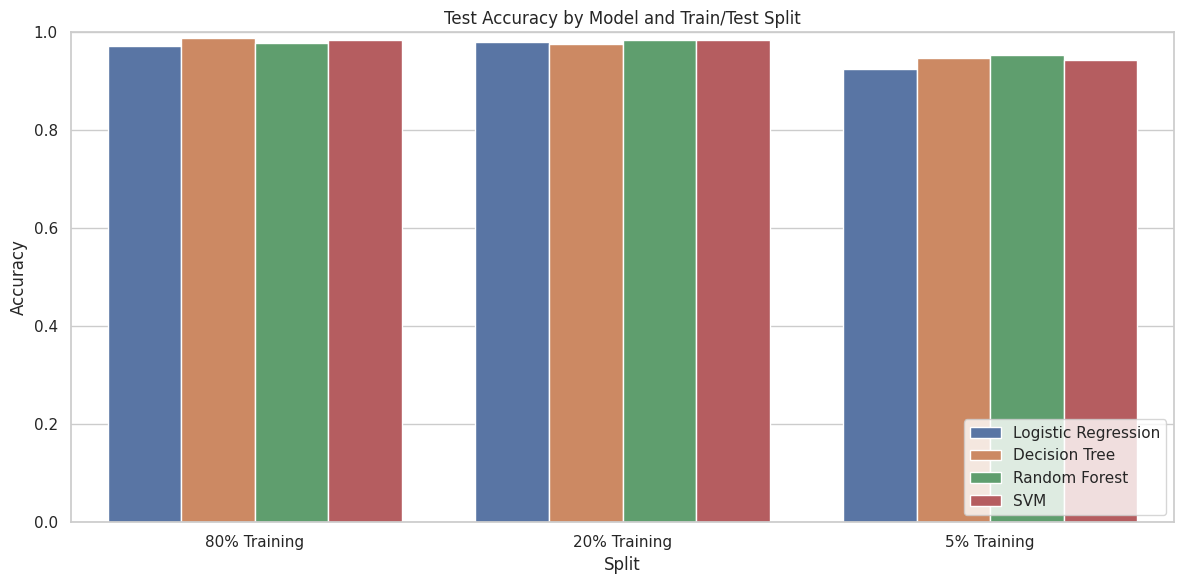

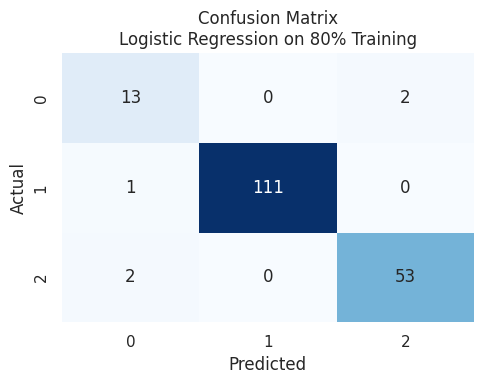

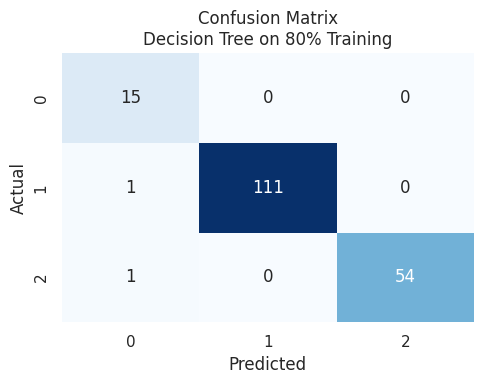

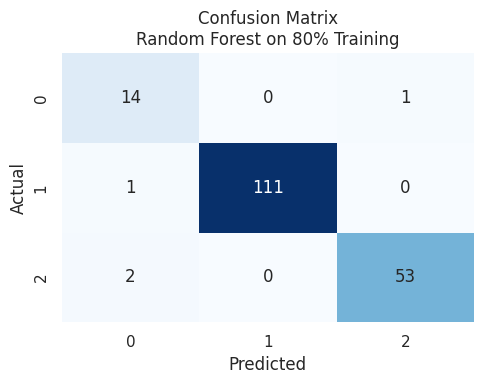

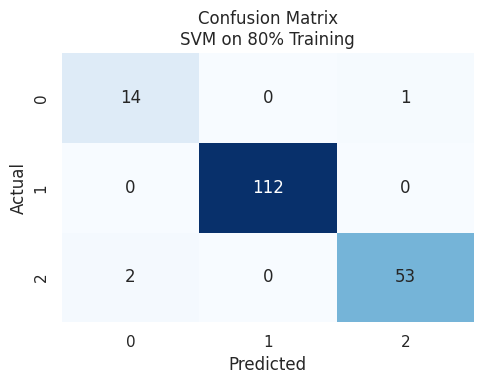

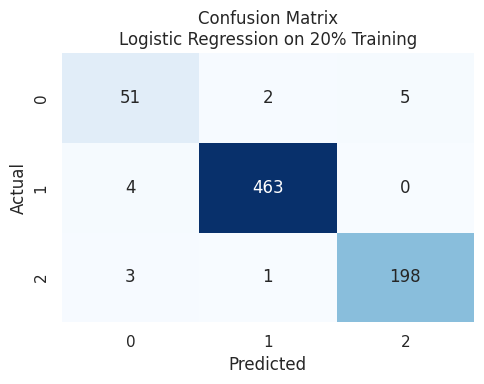

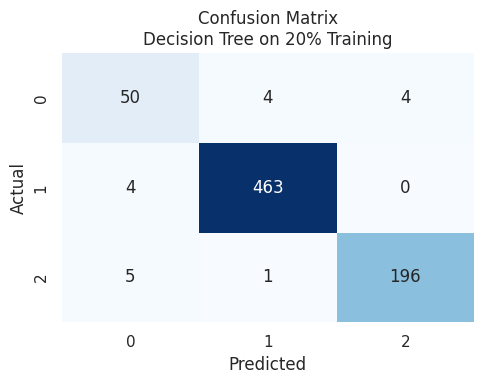

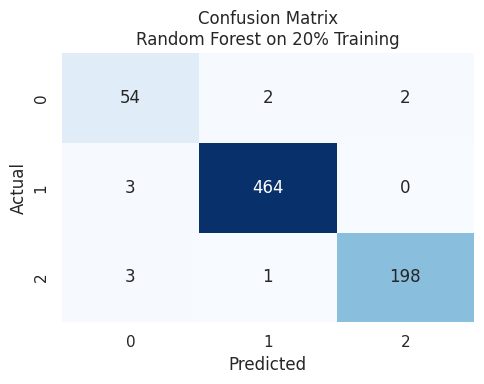

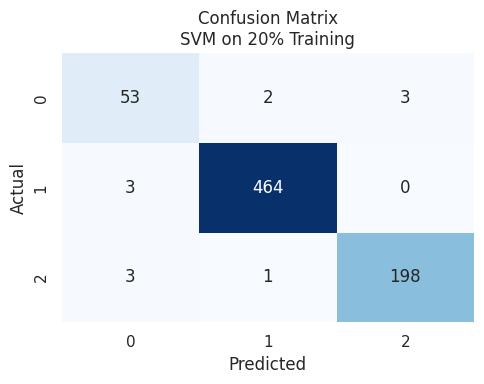

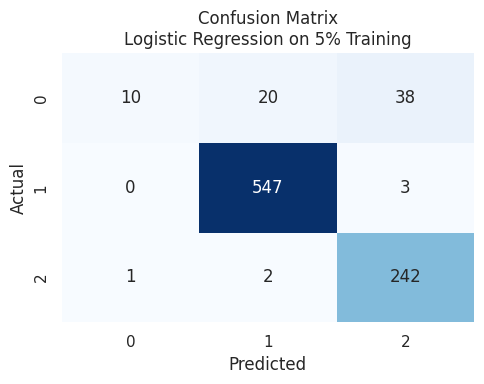

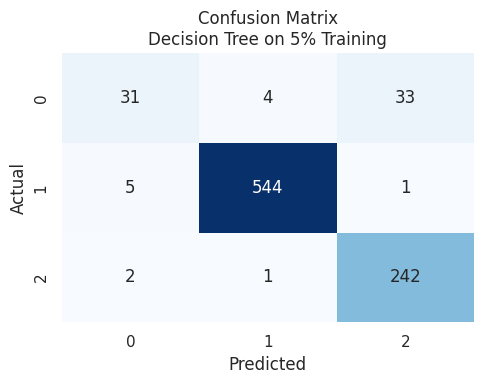

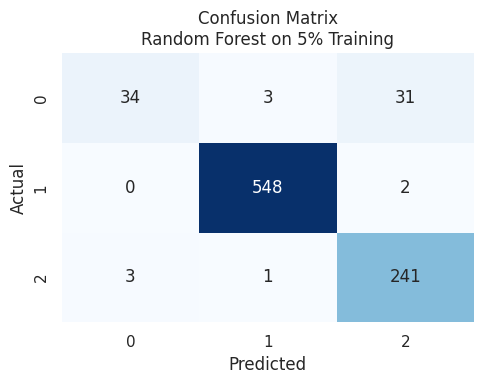

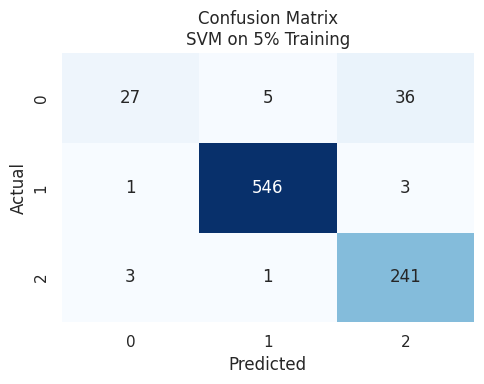

In [13]:
# Bar Plot of Test Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Split", y="Test Accuracy", hue="Model")
plt.title("Test Accuracy by Model and Train/Test Split")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Confusion Matrix Heatmaps
for res in results:
    plt.figure(figsize=(5, 4))
    sns.heatmap(res["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix\n{res['Model']} on {res['Split']}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

## SECTION 9: HYPERPARAMETER TUNING (Random Forest & SVM)

In [14]:
# Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
rf_gs = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
rf_gs.fit(X_train, y_train)

rf_best_model = rf_gs.best_estimator_
rf_best_preds = rf_best_model.predict(X_test)

# SVM Hyperparameter Tuning
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_gs = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy')
svm_gs.fit(X_train, y_train)

svm_best_model = svm_gs.best_estimator_
svm_best_preds = svm_best_model.predict(X_test)

# Create summary DataFrame
tuned_results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM'],
    'Best Params': [rf_gs.best_params_, svm_gs.best_params_],
    'Accuracy': [accuracy_score(y_test, rf_best_preds), accuracy_score(y_test, svm_best_preds)]
})


# Print reports
print("\nBest Random Forest Model")
print("Params:", rf_gs.best_params_)
print("Accuracy:", accuracy_score(y_test, rf_best_preds))
print("Classification Report:\n", classification_report(y_test, rf_best_preds))

print("\nBest SVM Model")
print("Params:", svm_gs.best_params_)
print("Accuracy:", accuracy_score(y_test, svm_best_preds))
print("Classification Report:\n", classification_report(y_test, svm_best_preds))


Best Random Forest Model
Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9524913093858632
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.49      0.63        68
           1       0.99      1.00      0.99       550
           2       0.88      0.98      0.93       245

    accuracy                           0.95       863
   macro avg       0.93      0.82      0.85       863
weighted avg       0.95      0.95      0.95       863


Best SVM Model
Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9617612977983777
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.63      0.74        68
           1       0.99      0.99      0.99       550
           2       0.91      0.98      0.95       245

    accuracy                           0.96       863
   macro avg       0.93      0.87      0.89       863
weighted avg      

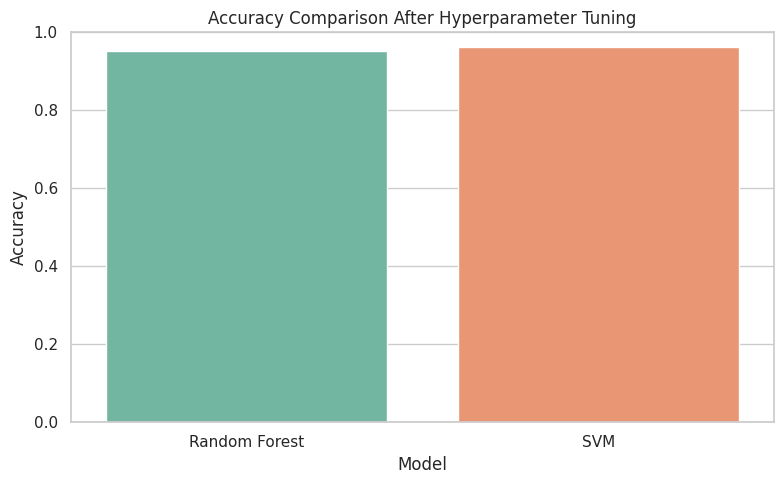

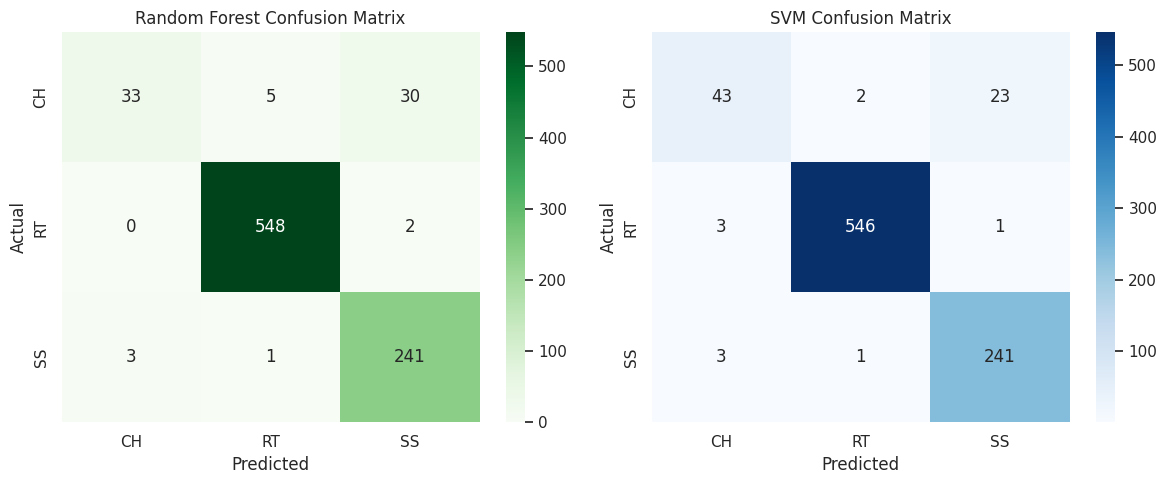

In [15]:
# Accuracy Comparison After Hyperparameter Tuning
plt.figure(figsize=(8, 5))
sns.barplot(data=tuned_results, x='Model', y='Accuracy', palette='Set2')
plt.title("Accuracy Comparison After Hyperparameter Tuning")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Optional: Get class labels for heatmaps
class_labels = label_enc.classes_

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, rf_best_preds), annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_xticklabels(class_labels)
axes[0].set_yticklabels(class_labels)

sns.heatmap(confusion_matrix(y_test, svm_best_preds), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_xticklabels(class_labels)
axes[1].set_yticklabels(class_labels)

plt.tight_layout()
plt.show()



In [16]:
# Summary of tuned model performance
tuned_results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM'],
    'Best Params': [rf_gs.best_params_, svm_gs.best_params_],
    'Accuracy': [accuracy_score(y_test, rf_best_preds), accuracy_score(y_test, svm_best_preds)]
})
print (tuned_results)

           Model                                        Best Params  Accuracy
0  Random Forest  {'max_depth': None, 'min_samples_split': 2, 'n...  0.952491
1            SVM     {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}  0.961761


## SECTION 10: CONCLUSION

In [17]:
display(HTML("<h2><b> SVM with hyperparameter tuning and least training data split achieved the best performance on this dataset.</b></h2>"))